# Support Vector Machine non-linear Data

#### Import der Bibliotheken

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import imp

#### XOR-Datensatz

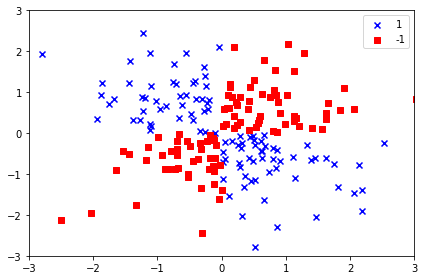

In [2]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_12.png', dpi=300)
plt.show()

#### Kernel SVM

In [3]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', C=1.0, random_state=1)

#### Training der SVM

In [4]:
svm_linear.fit(X_xor, y_xor)

SVC(kernel='linear', random_state=1)

#### Plot der Entscheidungsgrenze 

<class 'NoneType'>


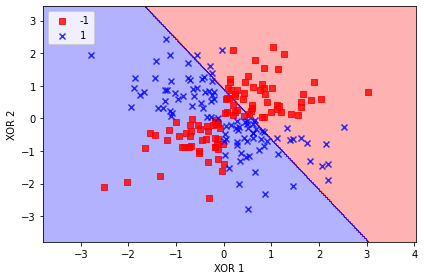

In [10]:
plot_decision_regions(
    X_train=X_xor,
    X_test=None,
    y_train=y_xor,
    y_test=None,
    classifier=svm_linear,
    xlabel='XOR 1',
    ylabel='XOR 2')
plt.savefig('svm_linear', dpi=300)
plt.show()

#### Nonlinear SVM

In [11]:
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)

#### Training der SVM

In [12]:
svm_rbf.fit(X_xor, y_xor)

SVC(C=10.0, gamma=0.1, random_state=1)

#### Plot der Entscheidungsgrenze

<class 'NoneType'>


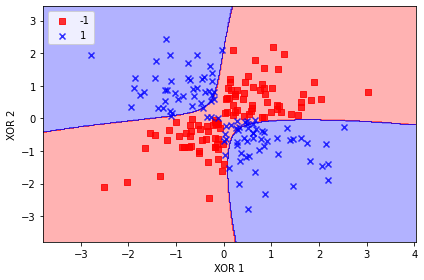

In [13]:
plot_decision_regions(
    X_train=X_xor,
    X_test=None,
    y_train=y_xor,
    y_test=None,
    classifier=svm_rbf,
    xlabel='XOR 1',
    ylabel='XOR 2')
plt.savefig('svm_nonlinear', dpi=300)
plt.show()

#### Utility Functions

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X_train, X_test, y_train, y_test, classifier, xlabel, ylabel, resolution=0.02):
    
    print(type(X_test))
    
    if X_test is None:
        X = X_train
        y = y_train
        test_idx = None
    else:
        X = np.vstack((X_train, X_test))
        y = np.hstack((y_train, y_test))
        test_idx = range(y_train.shape[0], y_train.shape[0]+y_test.shape[0])

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    facecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c==colors[idx],
                    facecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper left')
    plt.tight_layout()

def plot_history(hist1, hist2, label1, label2):
    epochs = range(1, len(hist1))
    hist1 = hist1[1:]
    hist2 = hist2[1:]
    # b+ is for "blue cross"
    plt.plot(epochs, hist1, 'b+', label=label1)
    # "bo" is for "blue dot"
    plt.plot(epochs, hist2, 'bo', label=label2)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()